In [59]:
import pandas as pd
import seaborn
from matplotlib import pyplot as plt

In [60]:
# Graphing config
seaborn.set()
plt.rcParams["figure.figsize"] = (15, 10)

SMALL_SIZE = 18
MEDIUM_SIZE = 21
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


def addlabels(x, y, offset=None):
    if offset is None:
        offset = [0 for i in y]
    for i in range(len(x)):
        plt.text(i, (y[i] / 2) + offset[i], y[i], ha = 'center')

## Experiment 1 - Changing Lambda Memory

In [15]:
df1 = pd.read_csv("results/experiment_1-changing-lambda-memory.csv")
df1 = df1.groupby("Memory (MB)").agg({
    "Initialization time (s)":"mean",
    "Invocation time (s)":"mean"
})
df1['Cost per 1M invocations ($)'] = df1.index * 0.001 * df1["Invocation time (s)"] * 0.0000166667 * 1_000_000

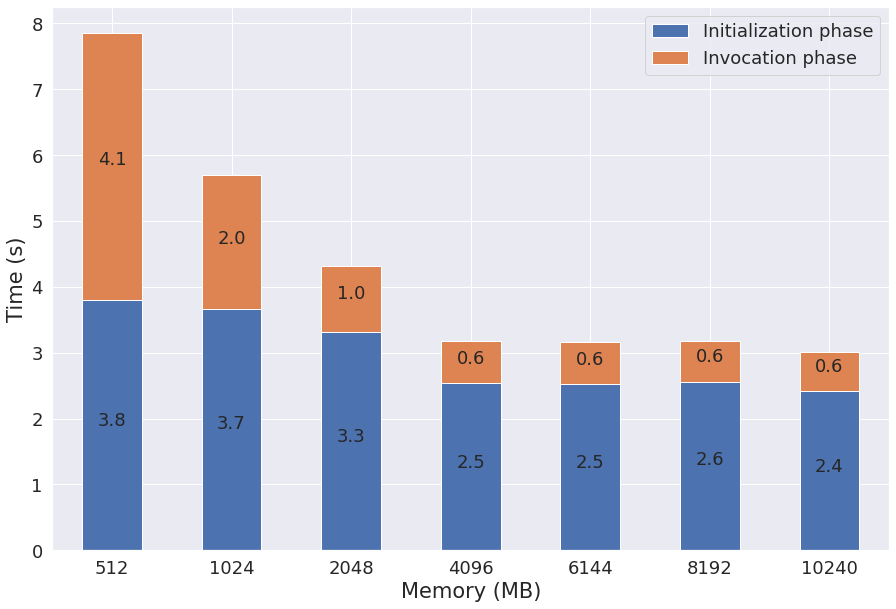

In [16]:
df1.plot(
    y=['Initialization time (s)', 'Invocation time (s)'],
    kind='bar',
    stacked=True,
)
plt.ylabel("Time (s)")
plt.xlabel("Memory (MB)")
plt.xticks(rotation=0)
plt.legend(['Initialization phase', 'Invocation phase'])
addlabels(df1.index.tolist(), df1["Initialization time (s)"].round(decimals=1).tolist())
addlabels(df1.index.tolist(), df1["Invocation time (s)"].round(decimals=1).tolist(),
          df1["Initialization time (s)"].tolist())

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '512'),
  Text(1, 0, '1024'),
  Text(2, 0, '2048'),
  Text(3, 0, '4096'),
  Text(4, 0, '6144'),
  Text(5, 0, '8192'),
  Text(6, 0, '10240')])

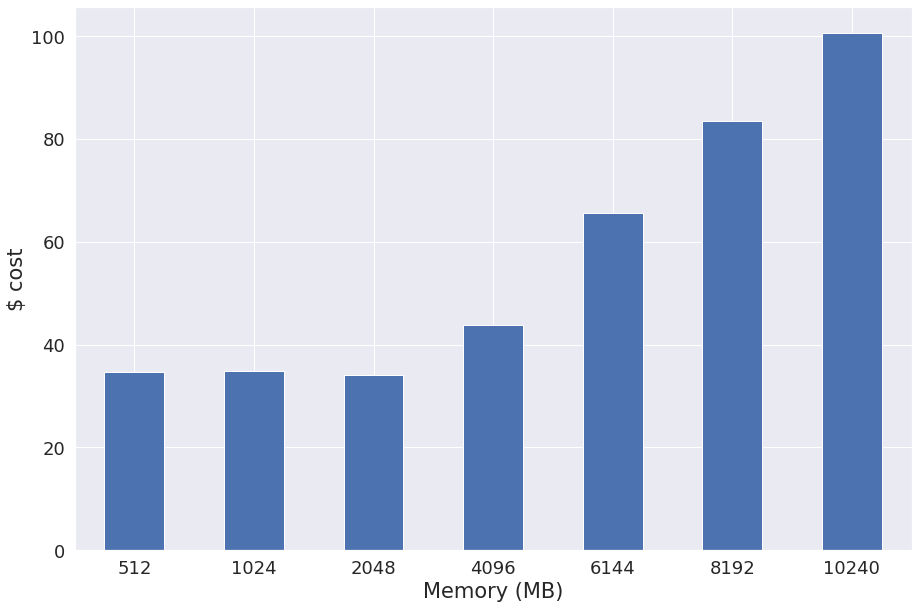

In [17]:
df1.plot(
    y=['Cost per 1M invocations ($)'],
    kind='bar',
    legend=False
)
# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel("$ cost")
plt.xlabel("Memory (MB)")
plt.xticks(rotation=0)
# plt.title("Cost per 1M Lambda cold start invocations")

## Experiment 2 - Changing Guice Init Location

In [18]:
df2 = pd.read_csv("results/experiment_2-changing-guice-init-location.csv")
df2 = df2[df2["Guice Initiaization Location"] != "Static member"]
df2 = df2.groupby("Guice Initiaization Location").agg({
    "Initialization time (s)":"mean",
    "Invocation time (s)":"mean"
})

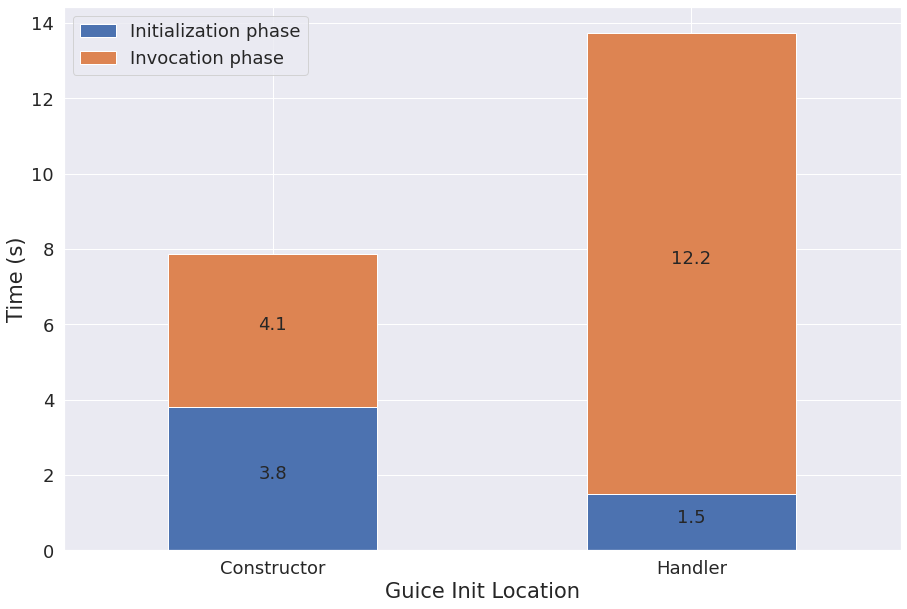

In [20]:
df2.plot(
    y=['Initialization time (s)', 'Invocation time (s)'],
    kind='bar',
    stacked=True
#     figsize=(8, 5)
)
plt.ylabel("Time (s)")
plt.xlabel("Guice Init Location")
plt.xticks(rotation=0)
# plt.title("Effect of Guice initialisation location on Lambda cold start time")
plt.legend(['Initialization phase', 'Invocation phase'])
addlabels(df2.index.tolist(), df2["Initialization time (s)"].round(decimals=1).tolist())
addlabels(df2.index.tolist(), df2["Invocation time (s)"].round(decimals=1).tolist(),
          df2["Initialization time (s)"].tolist())

## Experiment 3 - Pre-calling services

In [21]:
df3 = pd.read_csv("results/experiment_3-pre-calling-services.csv")
df3 = df3.groupby("Configuration").agg({
    "Initialization time (s)":"mean",
    "Invocation time (s)":"mean"
})

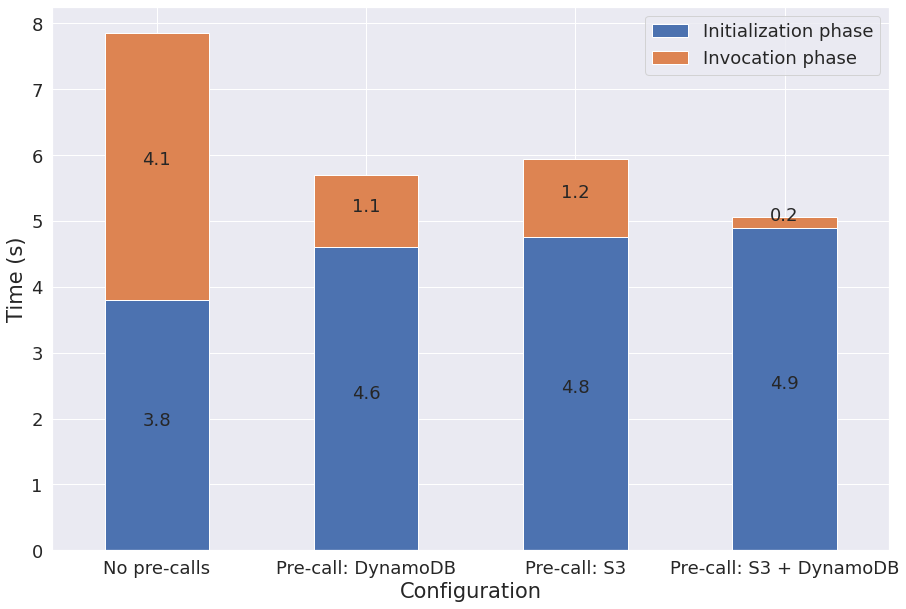

In [23]:
df3.plot(
    y=['Initialization time (s)', 'Invocation time (s)'],
    kind='bar',
    stacked=True,
)
plt.ylabel("Time (s)")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
# plt.title("Effect of pre-calling services on Lambda cold start time")
plt.legend(['Initialization phase', 'Invocation phase'])
addlabels(df3.index.tolist(), df3["Initialization time (s)"].round(decimals=1).tolist())
addlabels(df3.index.tolist(), df3["Invocation time (s)"].round(decimals=1).tolist(),
          df3["Initialization time (s)"].tolist())

## Experiment 4 - Guice vs Dagger

In [27]:
df4 = pd.read_csv("results/experiment_4-guice-vs-dagger.csv")
df4 = df4.groupby("DI Framework").agg({
    "Initialization time (s)":"mean",
    "Invocation time (s)":"mean"
})

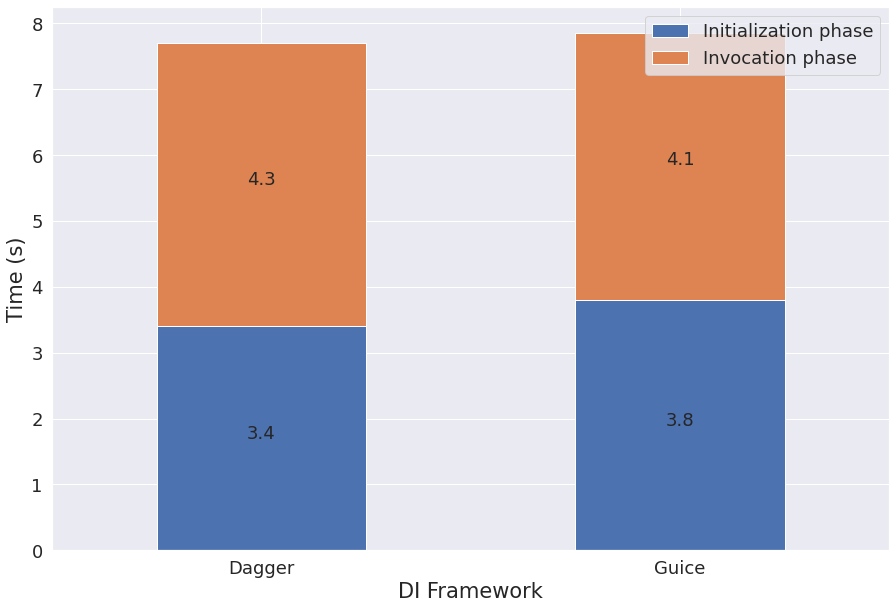

In [28]:
df4.plot(
    y=['Initialization time (s)', 'Invocation time (s)'],
    kind='bar',
    stacked=True,
)
plt.ylabel("Time (s)")
plt.xlabel("DI Framework")
plt.xticks(rotation=0)
# plt.title("Effect of dependency injection framework on Lambda cold start time")
plt.legend(['Initialization phase', 'Invocation phase'])
addlabels(df4.index.tolist(), df4["Initialization time (s)"].round(decimals=1).tolist())
addlabels(df4.index.tolist(), df4["Invocation time (s)"].round(decimals=1).tolist(),
          df4["Initialization time (s)"].tolist())

## Experiment 5 - Cold start type

In [24]:
df5 = pd.read_csv("results/experiment_5-cold-start-type.csv")
df5 = df5.groupby("Cold Start Type").agg({
    "Initialization time (s)":"mean",
    "Invocation time (s)":"mean"
})

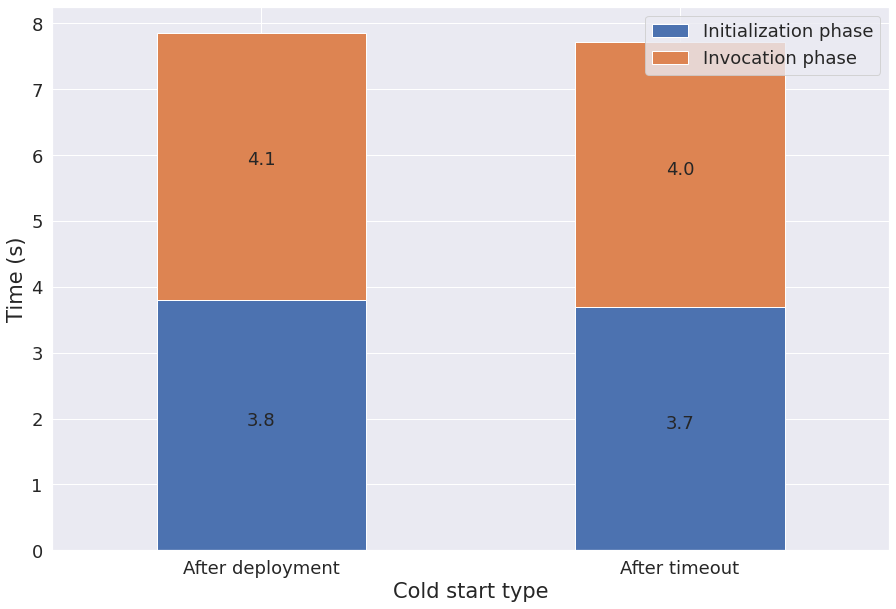

In [25]:
df5.plot(
    y=['Initialization time (s)', 'Invocation time (s)'],
    kind='bar',
    stacked=True,
)
plt.ylabel("Time (s)")
plt.xlabel("Cold start type")
plt.xticks(rotation=0)
# plt.title("Effect of cold start type on Lambda cold start time")
plt.legend(['Initialization phase', 'Invocation phase'])
addlabels(df5.index.tolist(), df5["Initialization time (s)"].round(decimals=1).tolist())
addlabels(df5.index.tolist(), df5["Invocation time (s)"].round(decimals=1).tolist(),
          df5["Initialization time (s)"].tolist())

## Experiment 6 - Deployment package size

In [29]:
df6 = pd.read_csv("results/experiment_6-deployment-package-size.csv")
df6['Deployment Size (Zipped) (MB)'] = df6['Deployment Size (Zipped) (MB)'].apply(
    lambda x: int(10 * round(float(x)/10)))
df6 = df6.groupby("Deployment Size (Zipped) (MB)").agg({
    "Pre-init time (s)":"mean",
    "Initialization time (s)":"mean",
    "Invocation time (s)":"mean"
})

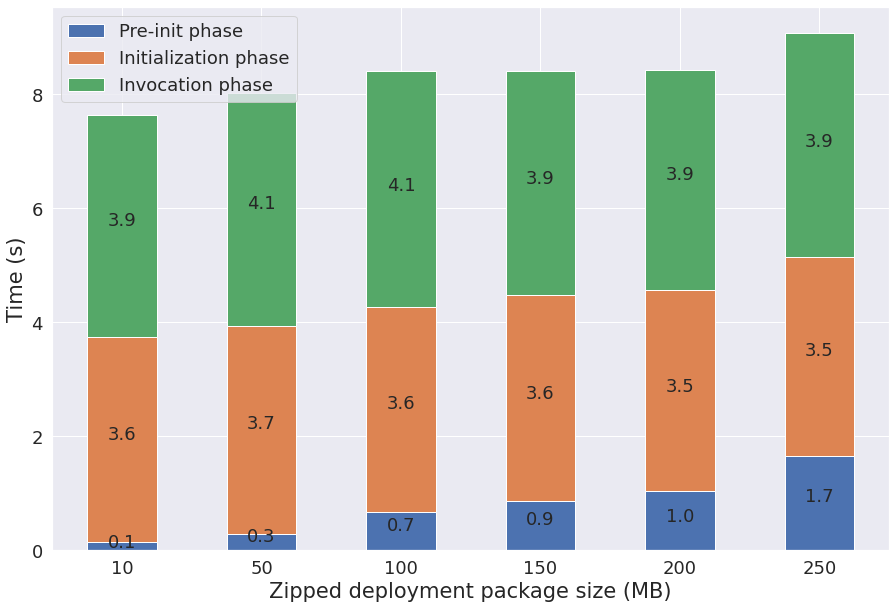

In [31]:
df6.plot(
    y=["Pre-init time (s)", 'Initialization time (s)', 'Invocation time (s)'],
    kind='bar',
    stacked=True,
)
plt.ylabel("Time (s)")
plt.xlabel("Zipped deployment package size (MB)")
plt.xticks(rotation=0)
# plt.title("Effect of deployment package size on Lambda cold start time")
plt.legend(['Pre-init phase', 'Initialization phase', 'Invocation phase'])
addlabels(df6.index.tolist(), df6["Pre-init time (s)"].round(decimals=1).tolist())
addlabels(df6.index.tolist(), df6["Initialization time (s)"].round(decimals=1).tolist(),
         df6["Pre-init time (s)"].tolist())
addlabels(df6.index.tolist(), df6["Invocation time (s)"].round(decimals=1).tolist(),
          (df6["Pre-init time (s)"] + df6["Initialization time (s)"]).tolist())

Note: 
Result at 250 MB after timeout cold start: 247.5		2.9	3.6	3.9
Therefore still see similar slowdown for large packages with timeout cold start

## Putting it all together

Changes:
- Memory: 512 MB > 4096 MB
- Pre-call DynamoDB & S3 in constructor

In [32]:
dfA = pd.read_csv("results/all_improvements.csv")
dfA = dfA.groupby("Configuration").agg({
    "Initialization time (s)":"mean",
    "Invocation time (s)":"mean"
})

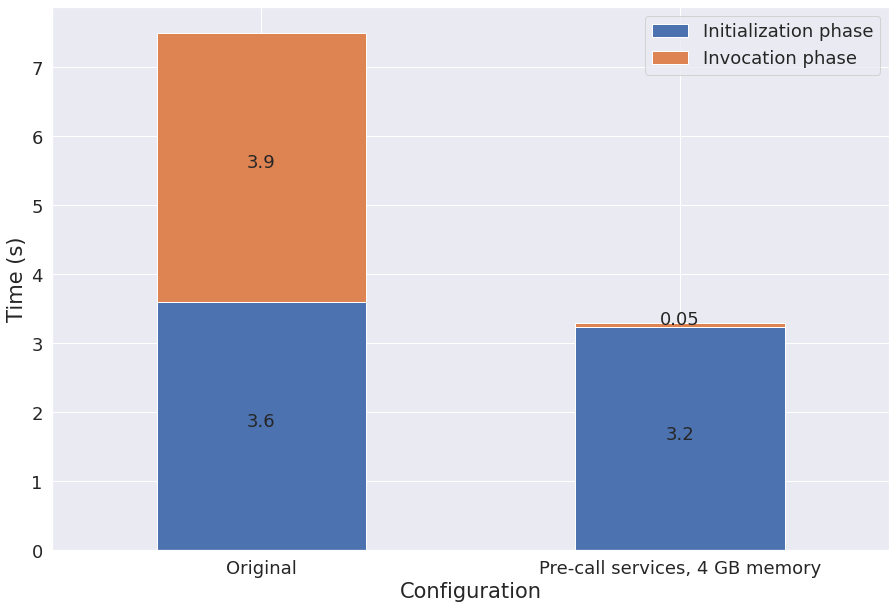

In [33]:
dfA.plot(
    y=['Initialization time (s)', 'Invocation time (s)'],
    kind='bar',
    stacked=True,
)
plt.ylabel("Time (s)")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
# plt.title("Effect of combining optimisations on Lambda cold start time")
plt.legend(['Initialization phase', 'Invocation phase'])
addlabels(dfA.index.tolist(), dfA["Initialization time (s)"].round(decimals=1).tolist())
addlabels(dfA.index.tolist(), dfA["Invocation time (s)"].round(decimals=2).tolist(),
          dfA["Initialization time (s)"].tolist())

### With Provisioned Concurrency

In [40]:
dfAPC = pd.read_csv("results/all_improvements_with_provisioned_concurrency.csv")
dfAPC = dfAPC.groupby("Configuration").agg({
    "Initialization time (s)":"mean",
    "Invocation time (s)":"mean"
})

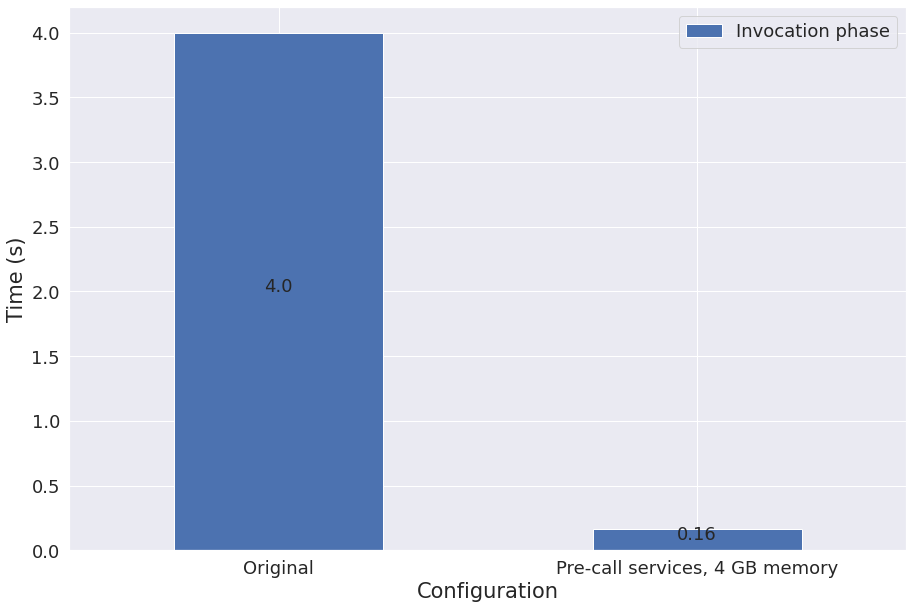

In [61]:
dfAPC.plot(
    y=['Invocation time (s)'],
    kind='bar',
    stacked=True,
)
plt.ylabel("Time (s)")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
# plt.title("Effect of combining optimisations on Lambda cold start time")
plt.legend(['Invocation phase'])
addlabels(dfAPC.index.tolist(), dfAPC["Invocation time (s)"].round(decimals=2).tolist())